# **Andrel John M. Pantanoza**

# **BSCS 3A IS**

# **Assessment Task 8**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('most-polluted-countries.csv')

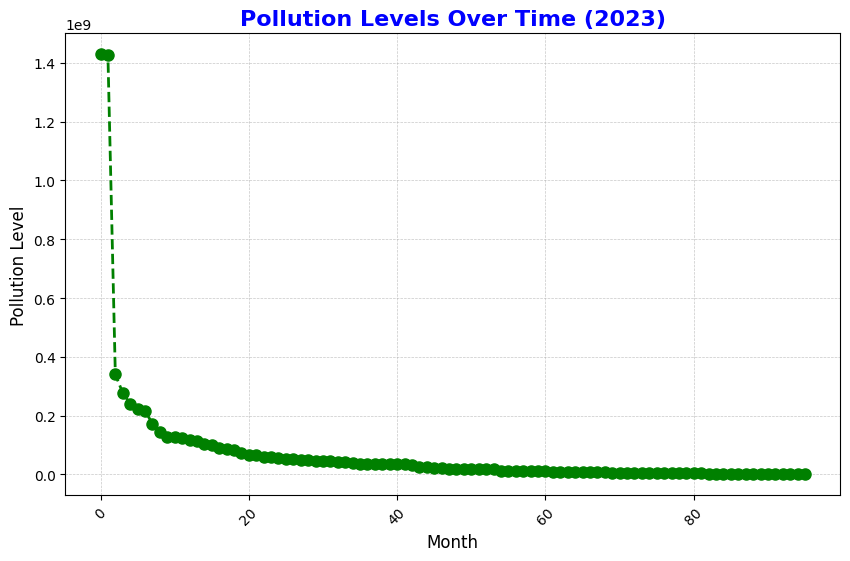

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pollution_2023'], marker='o', linestyle='--', color='green', linewidth=2, markersize=8)
plt.title('Pollution Levels Over Time (2023)', fontsize=16, fontweight='bold', color='blue')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Pollution Level', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

In [5]:
# Extract pollution levels data
pollution_levels = data['pollution_2023']

# Perform ADF test
result = adfuller(pollution_levels)
p_value = result[1]

# Interpretation
if p_value < 0.05:
    print(f"P-value: {p_value:.4f} (Reject null hypothesis)")
    print("The time series is likely stationary.")
else:
    print(f"P-value: {p_value:.4f} (Fail to reject null hypothesis)")
    print("The time series is likely non-stationary.")

# Implications
print("\nImplications:")
print("1. Stationary time series are easier to model and analyze.")
print("2. Non-stationary time series may exhibit trends or seasonality, making predictions challenging.")
print("3. If the time series is non-stationary, consider differencing or other transformations to achieve stationarity.")


P-value: 0.0148 (Reject null hypothesis)
The time series is likely stationary.

Implications:
1. Stationary time series are easier to model and analyze.
2. Non-stationary time series may exhibit trends or seasonality, making predictions challenging.
3. If the time series is non-stationary, consider differencing or other transformations to achieve stationarity.


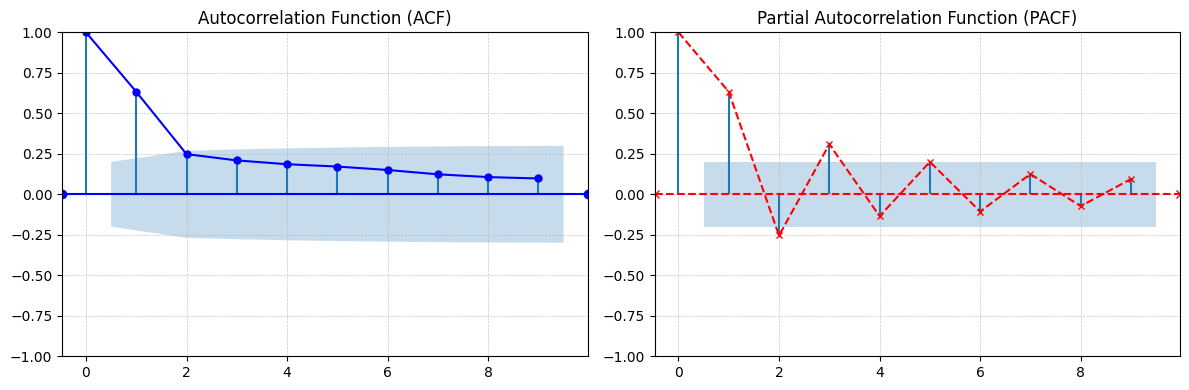

In [7]:
# Extract pollution levels data
pollution_levels = data['pollution_2023']

# Create ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(pollution_levels, lags=9, ax=axes[0], title="Autocorrelation Function (ACF)", marker='o', linestyle='-', color='blue')
plot_pacf(pollution_levels, lags=9, ax=axes[1], title="Partial Autocorrelation Function (PACF)", marker='x', linestyle='--', color='red')

# Customize grid
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [8]:
# Perform Augmented Dickey-Fuller test
adf_data = adfuller(data['pollution_2023'])

# Print ADF statistics and p-value
print('ADF Statistics:', adf_data[0])
print('p-value:', adf_data[1])

ADF Statistics: -3.300734202893016
p-value: 0.01484568748394119


In [9]:
# Define ARIMA model with order (1, 1, 1)
model = ARIMA(data['pollution_2023'], order=(1, 1, 1))

# Fit the model
results = model.fit()

# Print model summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:         pollution_2023   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21643.144
Date:                Wed, 27 Mar 2024   AIC                          43292.288
Time:                        23:38:10   BIC                          43299.949
Sample:                             0   HQIC                         43295.384
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6301      0.000   3971.372      0.000       0.630       0.630
ma.L1         -0.9165      0.000  -5155.984      0.000      -0.917      -0.916
sigma2      2.177e+13   1.04e-17   2.09e+30      0.0

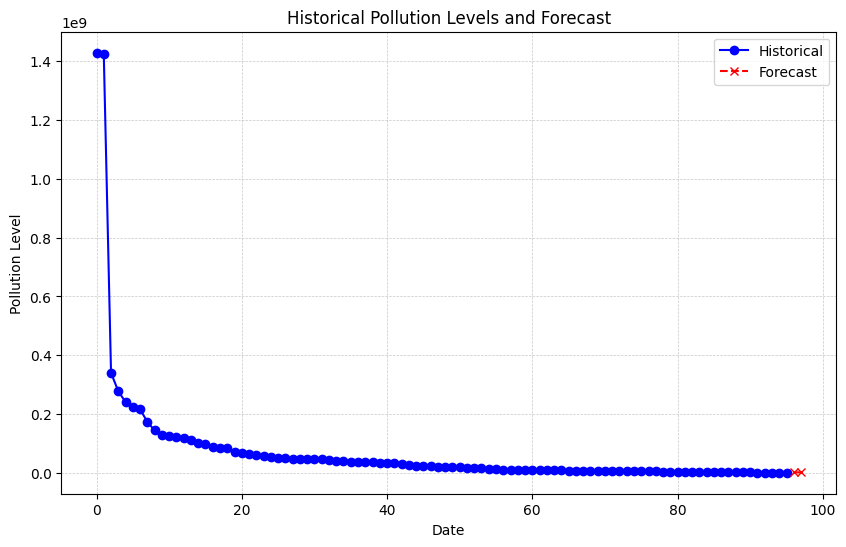

In [11]:
# Generate forecast for 2 years
forecast = results.forecast(steps=2)

# Plot historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pollution_2023'], color='blue', linestyle='-', label='Historical', marker='o')
plt.plot(forecast.index, forecast, color='red', linestyle='--', label='Forecast', marker='x')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.title('Historical Pollution Levels and Forecast')
plt.legend()

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.show()